In [ ]:
# Task 1:- Problem Statement
This project aims to analyze model-relationship to predict acute toxicity of a panel of 908 chemicals on fish Pimephales promelas (fathead minnow) using Multiple linear regression.

This file contains six molecular identifiers based on their properties and LC50 values;

 Feature	 Description
CICO	Set of indices of neighbourhood symmetry
SM1_Dz(Z)	Set of descriptors calculated from 2D matrices derived from the molecular graph (2D matrix_based descriptors)
GATS1i	2D Geary autocorrelation descriptor
NdsCH	Count the number of unsaturated sp2 carbon atoms of the type =CH-
NdssC	Count the number of unsaturatex sp2 carbon atoms of the type =C
MLOGP	The octanol-water partitioning coefficient (log P) calculated by means of the Moriguchi model


Dataset source: https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity

# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing the dataset

In [3]:
df=pd.read_csv('qsar_fish_toxicity.csv',header=None,delimiter=';')

df.head()

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Data Exploration 

In [5]:
df.rename({0: 'CIC0', 1: 'SM1_Dz(Z)',2:'GATS1i',3:'NdsCH',4:'NdssC',5:'MLOGP',6:'quantitative response, LC50 [-LOG(mol/L)]'}, axis=1, inplace=True)
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CIC0                                       908 non-null    float64
 1   SM1_Dz(Z)                                  908 non-null    float64
 2   GATS1i                                     908 non-null    float64
 3   NdsCH                                      908 non-null    int64  
 4   NdssC                                      908 non-null    int64  
 5   MLOGP                                      908 non-null    float64
 6   quantitative response, LC50 [-LOG(mol/L)]  908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [7]:
df.isnull().sum()

CIC0                                         0
SM1_Dz(Z)                                    0
GATS1i                                       0
NdsCH                                        0
NdssC                                        0
MLOGP                                        0
quantitative response, LC50 [-LOG(mol/L)]    0
dtype: int64

As you can see, there is no missing value in this data set and all variables are numeric values.

Generate the descriptive statistics of the dataset.

In [8]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [37]:
format(len(df[df.duplicated()]))

'1'

In [38]:
df.drop_duplicates(inplace=True)
print(df)

      CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLOGP  \
0    3.260      0.829   1.676      0      1  1.453   
1    2.189      0.580   0.863      0      0  1.348   
2    2.125      0.638   0.831      0      0  1.348   
3    3.027      0.331   1.472      1      0  1.807   
4    2.094      0.827   0.860      0      0  1.886   
..     ...        ...     ...    ...    ...    ...   
903  2.801      0.728   2.226      0      2  0.736   
904  3.652      0.872   0.867      2      3  3.983   
905  3.763      0.916   0.878      0      6  2.918   
906  2.831      1.393   1.077      0      1  0.906   
907  4.057      1.032   1.183      1      3  4.754   

     quantitative response, LC50 [-LOG(mol/L)]  
0                                        3.770  
1                                        3.115  
2                                        3.531  
3                                        3.510  
4                                        5.390  
..                                         ...  
903     

In [40]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.898559,0.628521,1.293980,0.229327,0.486218,2.109735,4.064723
std,0.756394,0.428692,0.394346,0.605621,0.861603,1.433907,1.456475
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.346000,0.223000,0.951000,0.000000,0.000000,1.209000,3.151500
50%,2.937000,0.570000,1.244000,0.000000,0.000000,2.127000,3.991000
75%,3.407000,0.894500,1.562500,0.000000,1.000000,3.105000,4.909000
90%,3.832400,1.267000,1.805600,1.000000,2.000000,3.987400,5.935400
95%,4.169500,1.439800,2.010300,1.000000,2.000000,4.490100,6.483700
99%,4.564200,1.738680,2.326040,3.000000,4.000000,5.359680,8.166780


In [41]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

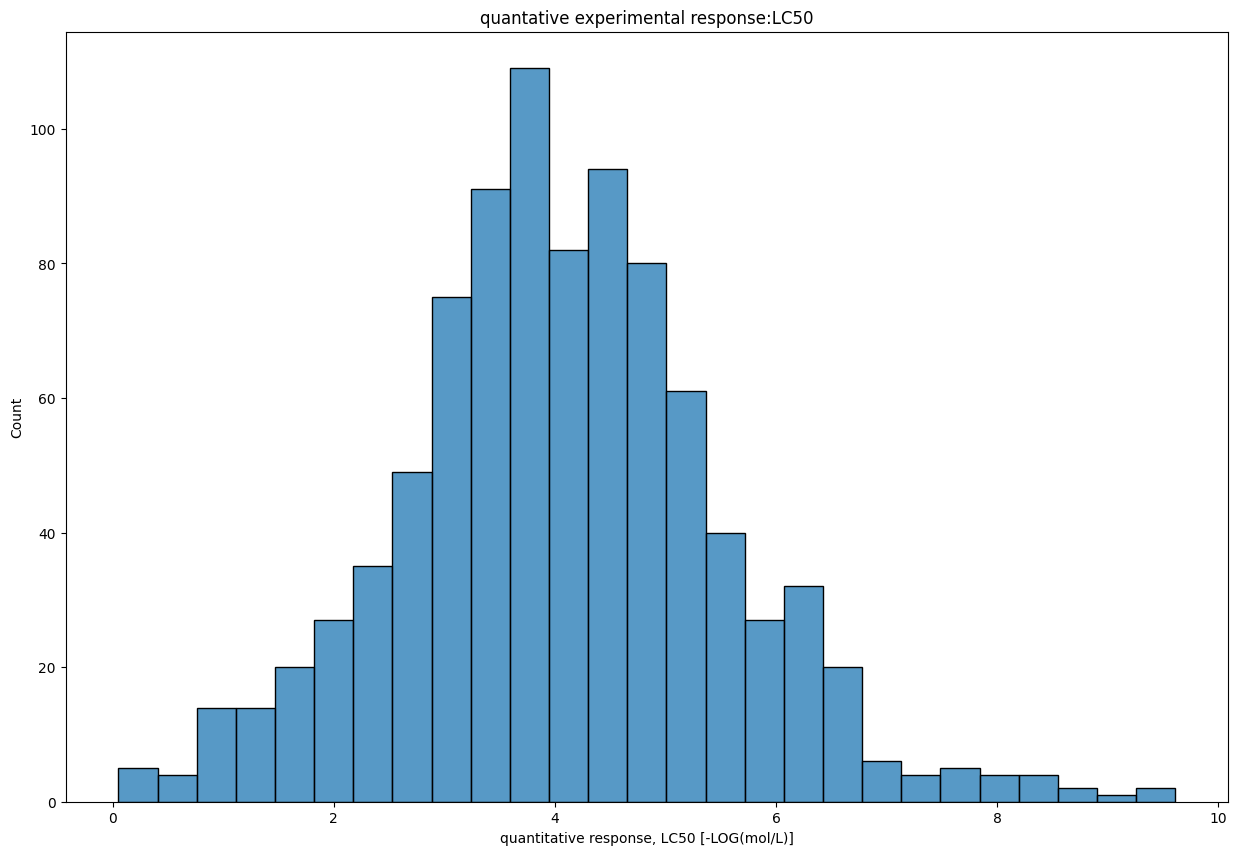

In [44]:
plt.title("quantative experimental response:LC50")
ax= sns.histplot(df["quantitative response, LC50 [-LOG(mol/L)]"])

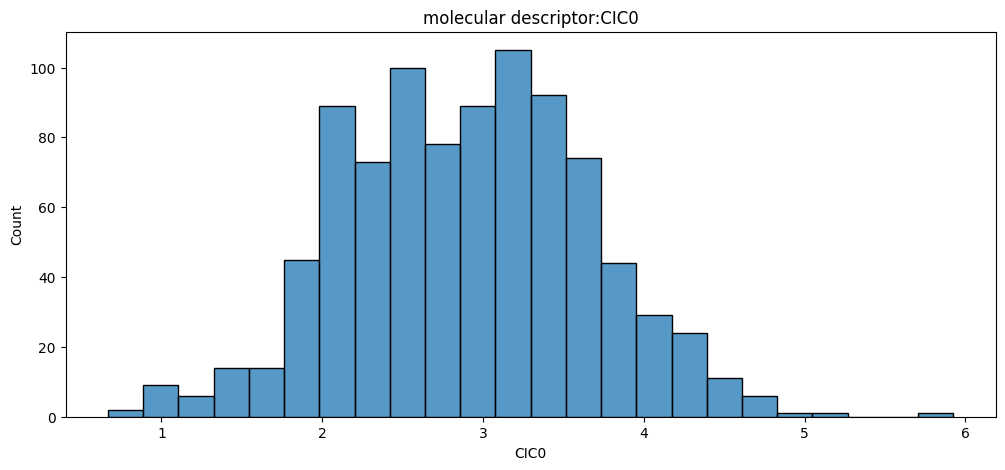

In [46]:
plt.figure(figsize=(12,5))
plt.title("molecular descriptor:CIC0")
ax= sns.histplot(df["CIC0"])

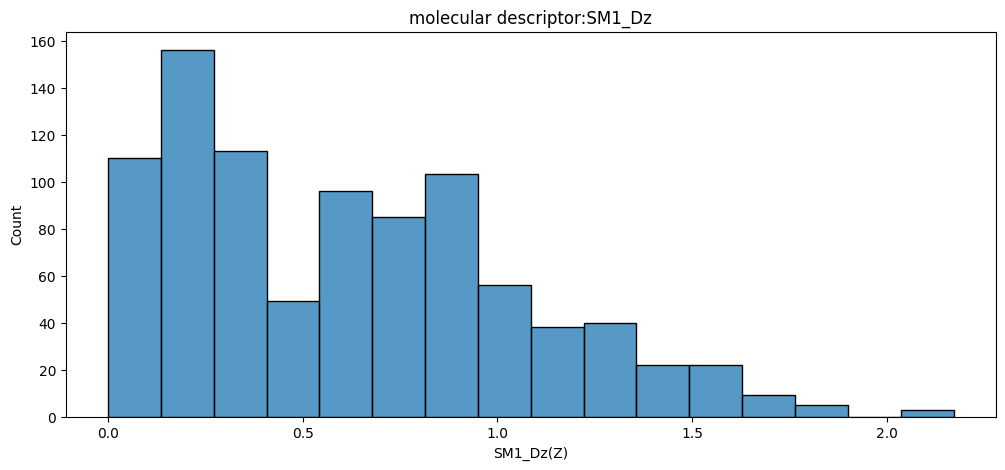

In [48]:
plt.figure(figsize=(12,5))
plt.title("molecular descriptor:SM1_Dz")
ax= sns.histplot(df["SM1_Dz(Z)"])

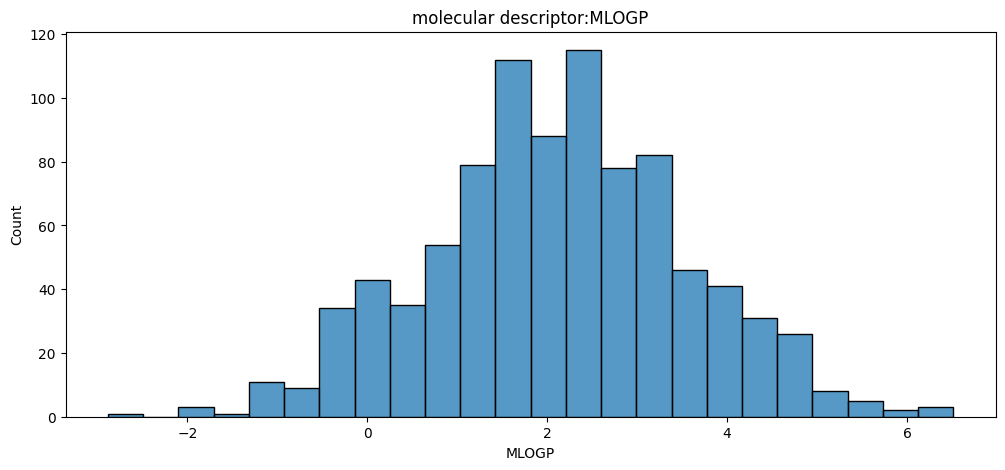

In [49]:
plt.figure(figsize=(12,5))
plt.title("molecular descriptor:MLOGP")
ax= sns.histplot(df["MLOGP"])

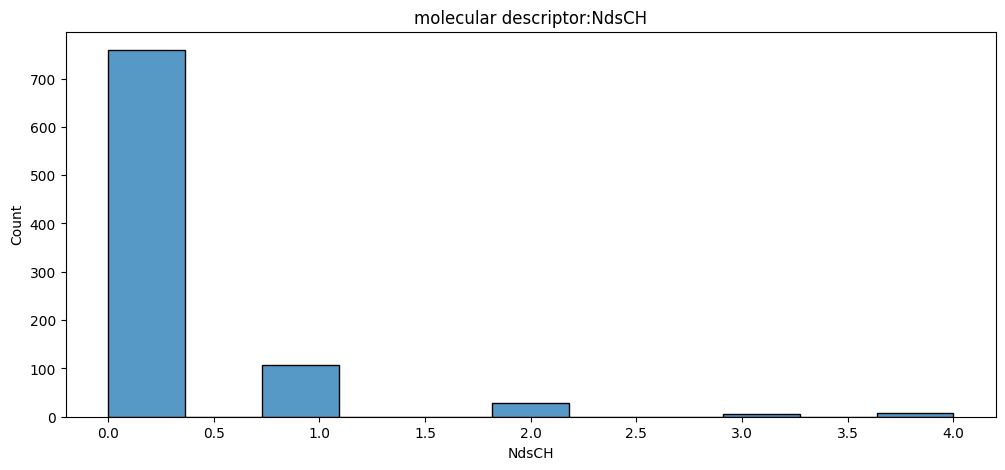

In [51]:
plt.figure(figsize=(12,5))
plt.title("molecular descriptor:NdsCH")
ax= sns.histplot(df["NdsCH"])

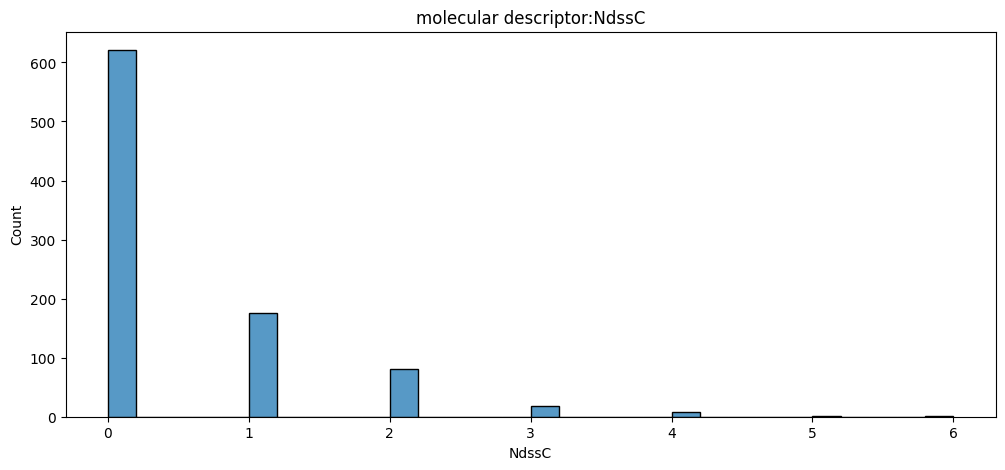

In [53]:
plt.figure(figsize=(12,5))
plt.title("molecular descriptor:NdssC")
ax= sns.histplot(df["NdssC"])

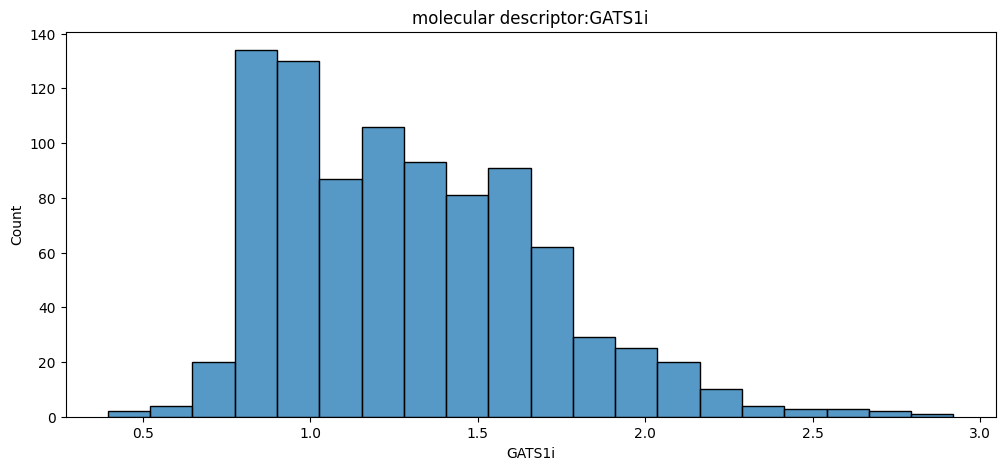

In [55]:
plt.figure(figsize=(12,5))
plt.title("molecular descriptor:GATS1i")
ax= sns.histplot(df["GATS1i"])

# Correlation Analysis 
Calculate the correlation of each column with the LC50

In [9]:
df.corr(method="pearson")

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz(Z),-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
"quantitative response, LC50 [-LOG(mol/L)]",0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


From the correlation of the above test for LC50, we can see that the MLOGP correlation is the highest, 0.652, and the GATS1i correlation is the lowest, -0.398.

Visualising each variable using countplot and kdeplot

<function matplotlib.pyplot.show(close=None, block=None)>

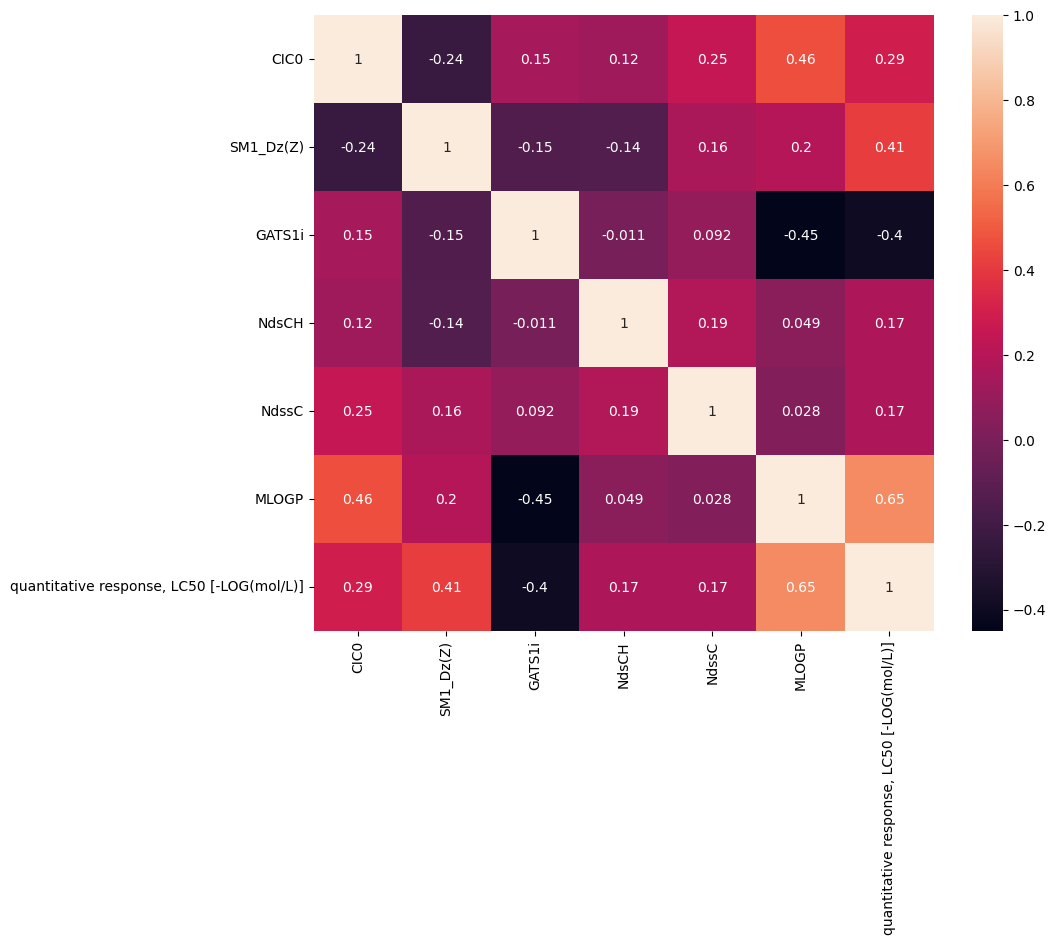

In [10]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(df.corr(method="pearson"), annot = True)
plt.show

In [34]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [35]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


# Data Preparation
Split the target and features in the dataset.

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [15]:
x

array([[3.26 , 0.829, 1.676, 0.   , 1.   , 1.453],
       [2.189, 0.58 , 0.863, 0.   , 0.   , 1.348],
       [2.125, 0.638, 0.831, 0.   , 0.   , 1.348],
       ...,
       [3.763, 0.916, 0.878, 0.   , 6.   , 2.918],
       [2.831, 1.393, 1.077, 0.   , 1.   , 0.906],
       [4.057, 1.032, 1.183, 1.   , 3.   , 4.754]])

In [16]:
y

array([3.77 , 3.115, 3.531, 3.51 , 5.39 , 1.819, 3.947, 3.513, 4.402,
       3.021, 3.21 , 2.371, 3.919, 3.03 , 2.736, 2.157, 2.413, 0.898,
       0.45 , 3.733, 2.976, 6.535, 5.643, 4.629, 4.838, 4.081, 3.436,
       3.45 , 1.102, 4.257, 5.386, 3.393, 1.308, 3.554, 2.269, 4.165,
       5.896, 4.829, 4.59 , 2.092, 3.665, 3.56 , 4.805, 3.174, 7.899,
       2.67 , 4.016, 3.857, 5.522, 4.851, 3.84 , 4.586, 5.284, 3.559,
       4.091, 4.33 , 3.755, 4.552, 3.62 , 4.459, 2.827, 6.38 , 4.786,
       3.861, 3.262, 6.297, 3.546, 2.92 , 3.203, 2.283, 1.559, 3.47 ,
       4.748, 2.576, 5.259, 4.564, 4.37 , 0.053, 2.381, 2.891, 1.088,
       3.721, 3.701, 6.083, 4.628, 3.7  , 1.842, 3.396, 2.99 , 3.573,
       2.271, 2.085, 3.822, 3.29 , 3.84 , 3.979, 3.47 , 3.314, 4.031,
       4.74 , 4.194, 3.447, 2.364, 3.645, 2.07 , 2.27 , 3.513, 2.811,
       2.832, 1.639, 2.016, 1.651, 4.097, 3.123, 3.231, 5.052, 3.572,
       2.436, 2.567, 1.795, 5.072, 2.156, 1.037, 1.932, 2.505, 1.524,
       3.048, 5.115,

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Predicting the Test set results

In [19]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[4.89 5.48]
 [4.67 4.69]
 [4.11 4.22]
 [4.2  3.35]
 [2.8  3.5 ]
 [1.54 1.47]
 [4.35 4.33]
 [4.28 4.86]
 [3.37 3.31]
 [3.17 2.74]
 [5.98 8.57]
 [4.55 4.04]
 [5.48 6.54]
 [4.97 6.25]
 [4.34 4.18]
 [3.42 2.39]
 [7.05 6.9 ]
 [3.05 3.83]
 [5.45 5.75]
 [5.18 4.67]
 [2.59 1.89]
 [4.13 3.39]
 [3.13 4.51]
 [4.15 3.65]
 [3.37 3.57]
 [4.92 5.68]
 [4.97 6.21]
 [6.58 7.64]
 [1.93 1.84]
 [3.7  1.05]
 [3.69 4.77]
 [4.25 4.68]
 [4.9  7.85]
 [5.12 4.74]
 [4.75 4.54]
 [3.1  2.55]
 [3.84 3.67]
 [5.17 6.21]
 [4.4  4.21]
 [2.31 0.6 ]
 [5.81 3.41]
 [4.39 5.06]
 [3.53 4.51]
 [3.07 2.23]
 [1.63 1.18]
 [3.91 3.63]
 [5.11 6.72]
 [1.63 0.05]
 [4.32 3.76]
 [3.3  1.09]
 [5.39 5.84]
 [3.91 4.09]
 [2.37 1.3 ]
 [4.14 6.15]
 [5.5  5.25]
 [3.87 5.34]
 [3.73 3.66]
 [3.53 3.45]
 [3.36 2.69]
 [3.24 4.6 ]
 [3.74 4.07]
 [3.   6.3 ]
 [4.04 5.24]
 [2.69 3.48]
 [3.37 3.11]
 [4.08 3.7 ]
 [3.93 3.66]
 [3.49 2.83]
 [3.46 3.76]
 [4.39 4.51]
 [3.05 4.24]
 [3.36 3.9 ]
 [5.01 3.61]
 [2.69 3.78]
 [4.68 4.37]
 [4.84 3.69]
 [4.27 4.02]

# Checking Assumptions

# Assumption 1 : Linear Relationship

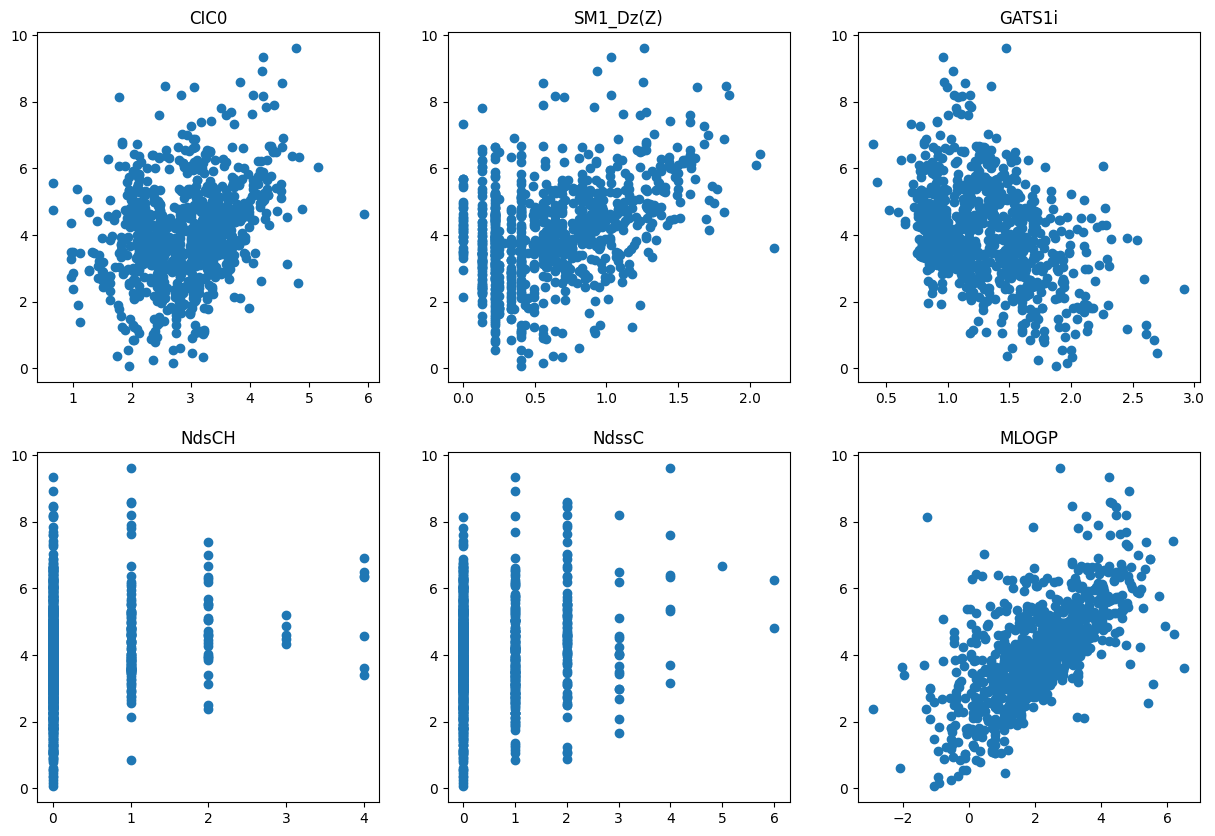

In [20]:
plt.rcParams["figure.figsize"]= (15,10)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3)
ax1.scatter(df['CIC0'], y)
ax1.set_title('CIC0')
ax2.scatter(df['SM1_Dz(Z)'], y)
ax2.set_title('SM1_Dz(Z)')
ax3.scatter(df['GATS1i'], y)
ax3.set_title('GATS1i')
ax4.scatter(df['NdsCH'], y)
ax4.set_title('NdsCH')
ax5.scatter(df['NdssC'], y)
ax5.set_title('NdssC')
ax6.scatter(df['MLOGP'], y)
ax6.set_title('MLOGP')
plt.show()

As we can see almost all three components shows almost linear relationship with the target output. Hence our assumption is satisfied.

# Assumption 2: Multicollinearity


In [22]:
# Method 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =[]
for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train, i))

In [23]:
pd.DataFrame({'vif':vif}, index=df.columns[0:6]).T

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP
vif,25.899573,3.443391,14.539373,1.244617,1.572381,7.61175


<AxesSubplot: >

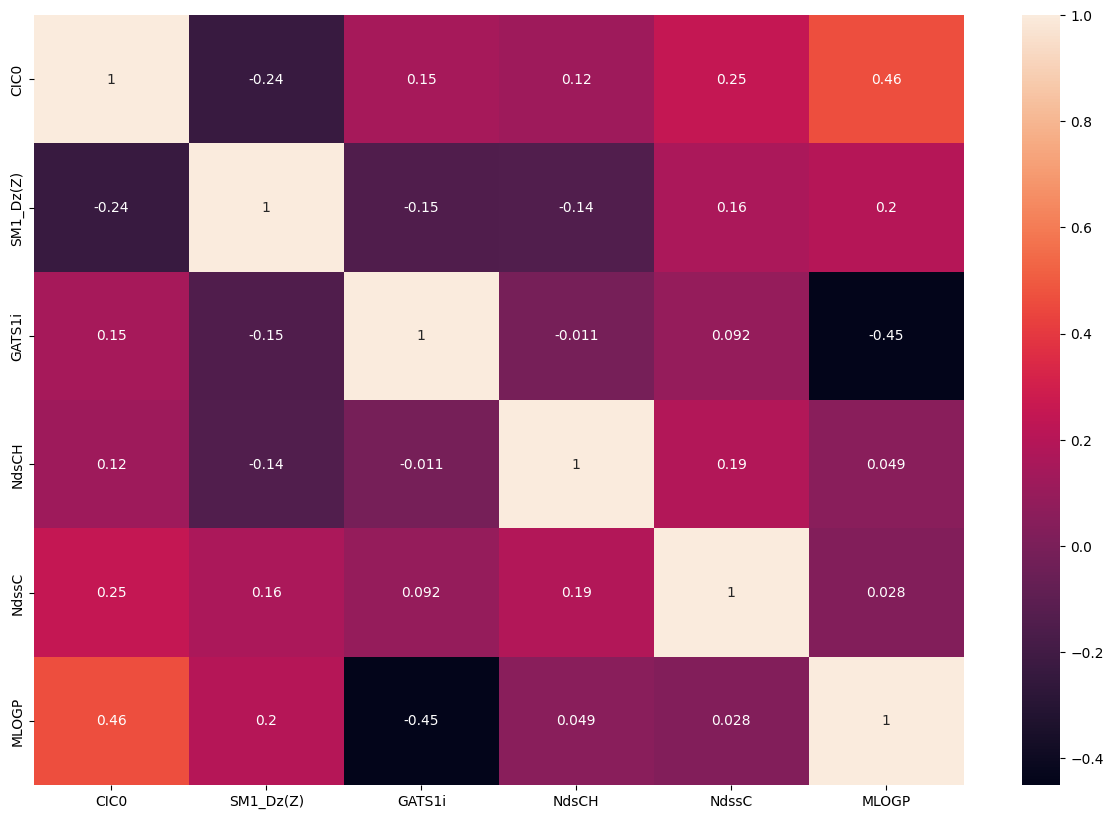

In [32]:
# Method 2
sns.heatmap(df.iloc[:,0:6].corr(), annot=True)

# Assumption 3: Normal Residual

In [25]:
# Residual
residual = y_test-y_pred

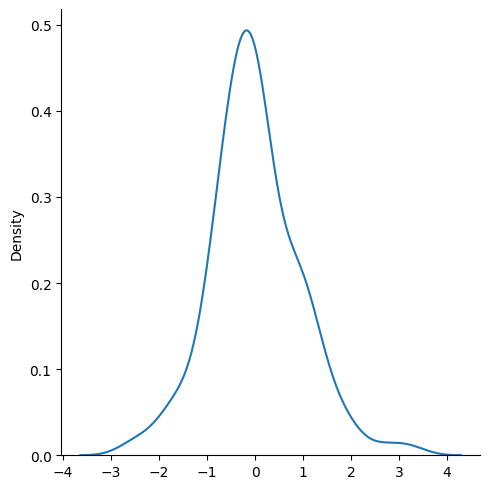

In [26]:
# method 1
sns.displot(residual, kind = 'kde')

As mean is close to zero, so our assumption holds.

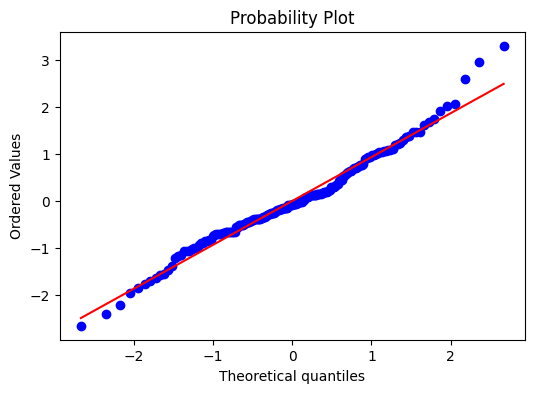

In [28]:
# Method 2
# QQ Plot
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

As points are closely aligned to line, hence our third assumption holds.

# Assumption 4: Homoscedasticity

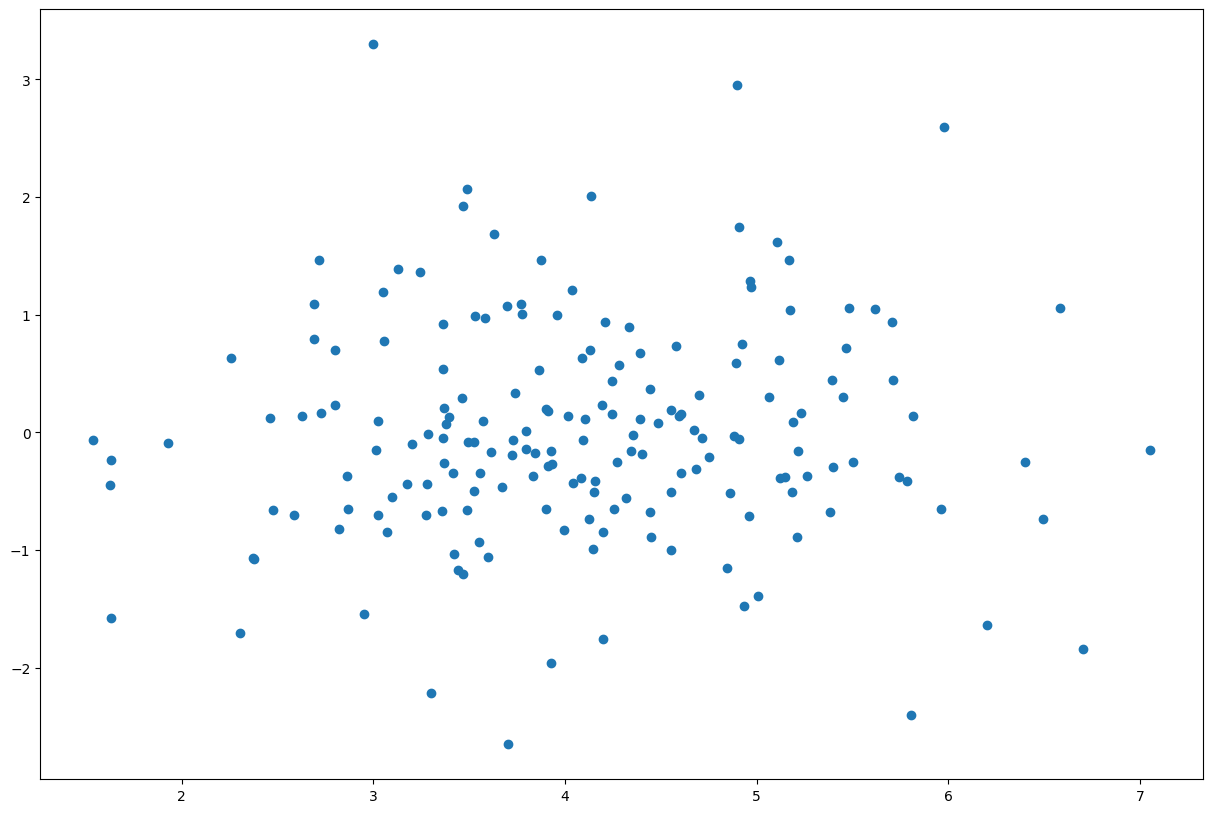

In [29]:
plt.scatter(y_pred, residual)

As points are uniformally scattered so our assumption holds.

# No Autocorrelation of error


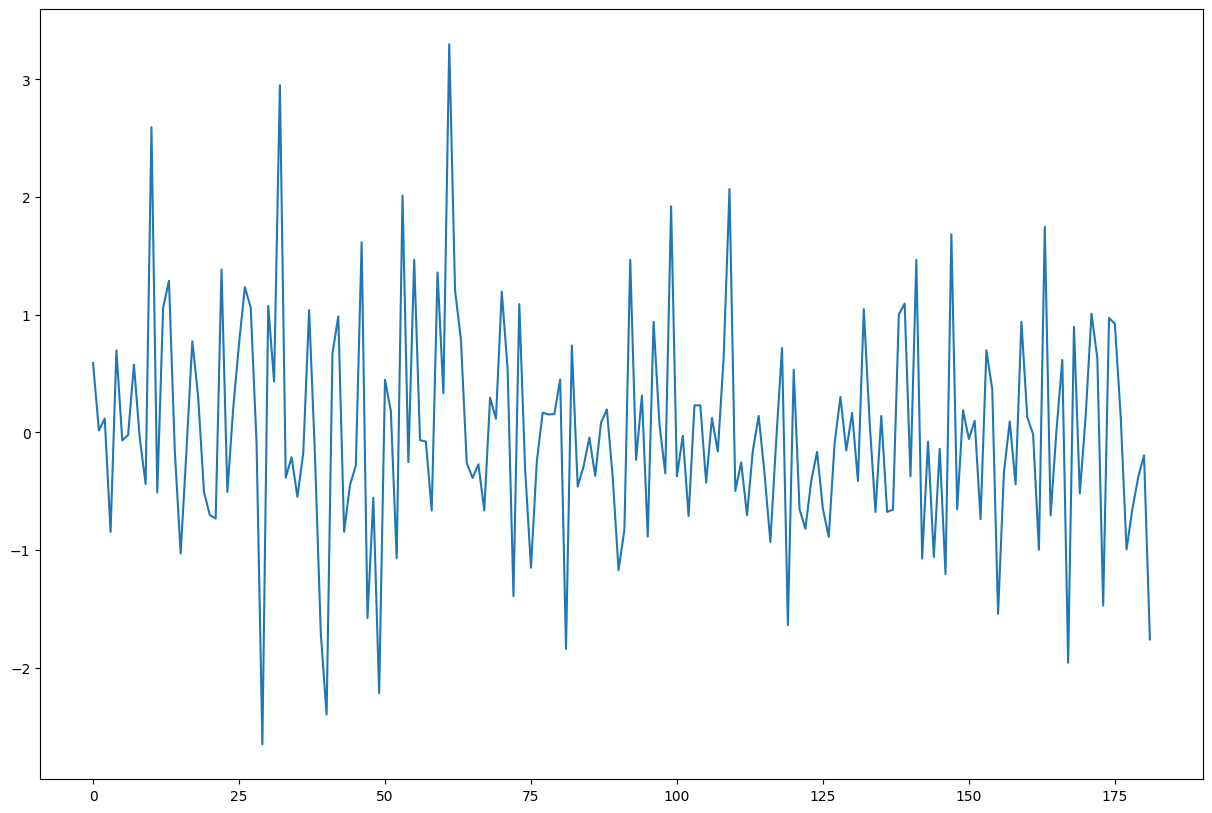

In [30]:
plt.plot(residual)

No postive autocorrelation exists between residuals, Hence our assumption holds.

In [76]:
print("Accuracy is", regressor.score(x_test, y_test)*100)

Accuracy is 57.86763170705483


# Statistical Inference.
The Multiple linear regression  model to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) has been successfully developed. Based on our evaluation, the regression model predicts result with an accuracy of 57.88%.

To improve the model's performance, we recommend considering alternative model architectures like KNN, Decision Tree or adjusting the model's hyperparameters. Additionally, it may be helpful to analyze the characteristics of the training and testing sets to identify any potential issues or biases that could be impacting the model's performance.

Overall, the model demonstrated relatively good performance on both the training and testing sets, although further optimization may be necessary to improve its ability to make accurate predictions on unseen examples.